In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
%matplotlib inline
warnings.filterwarnings('ignore')

### Training a Machine Learning Model

In [2]:
data = np.load('./data/data_pca_50_y_mean.pkl.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4368, 50), (1092, 50), (4368,), (1092,))

In [5]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True,)
model.fit(x_train,y_train)
# Train score
print(model.score(x_train,y_train))
# Test score
print(model.score(x_test,y_test))

0.862408424908425
0.7893772893772893


### Model Evaluation
- Confusion Matrix
- Classification Report 
- Kappa Score
- ROC and AUC (probability)

In [6]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) 

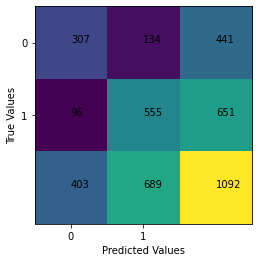

In [7]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [8]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.761787,0.696145,0.727488,441.000000
female,0.805515,0.852535,0.828358,651.000000
accuracy,0.789377,0.789377,0.789377,0.789377
macro avg,0.783651,0.774340,0.777923,1092.000000
weighted avg,0.787856,0.789377,0.787622,1092.000000


In [9]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5564127290260367

### ROC and AUC

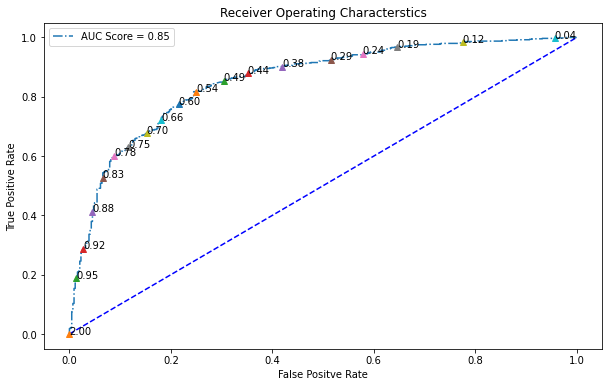

In [10]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

### Hyper Parameter Tuning

In [11]:
model_tune = SVC()
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1],
             }

model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)
model_grid.fit(X,y)

print(model_grid.best_params_)
print(model_grid.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.3s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.5s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.2s
[CV] END ...............C=1, coef0=0, gamma=0.05, kernel=rbf; total time=   2.2s
[CV] END ...............C=1, coef0=0, gamma=0.

In [13]:
# WIth best parameter buil ML Model
model_best = SVC(C=30,kernel='rbf',gamma=0.002,probability=True)

model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.7957875457875457

In [14]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) 

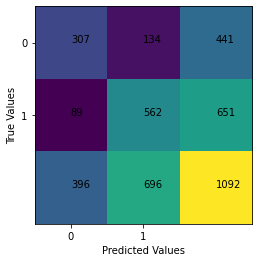

In [15]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [16]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.775253,0.696145,0.733572,441.000000
female,0.807471,0.863287,0.834447,651.000000
accuracy,0.795788,0.795788,0.795788,0.795788
macro avg,0.791362,0.779716,0.784010,1092.000000
weighted avg,0.794460,0.795788,0.793709,1092.000000


In [17]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5687936932916853

### ROC and AUC

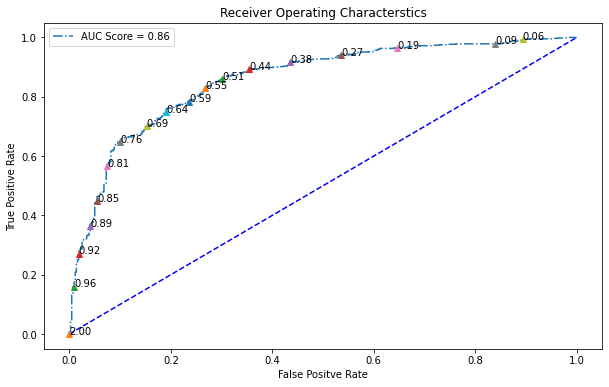

In [18]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [29]:
pickle.dump(model_best,open('./model/model_svm_best.pkl','wb'))
pickle.dump(mean,open('./model/mean_preprocess.pkl','wb'))